### Installing Required Libraries

In [2]:
%pip install seaborn
%pip install folium


Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


# Importing Data


In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


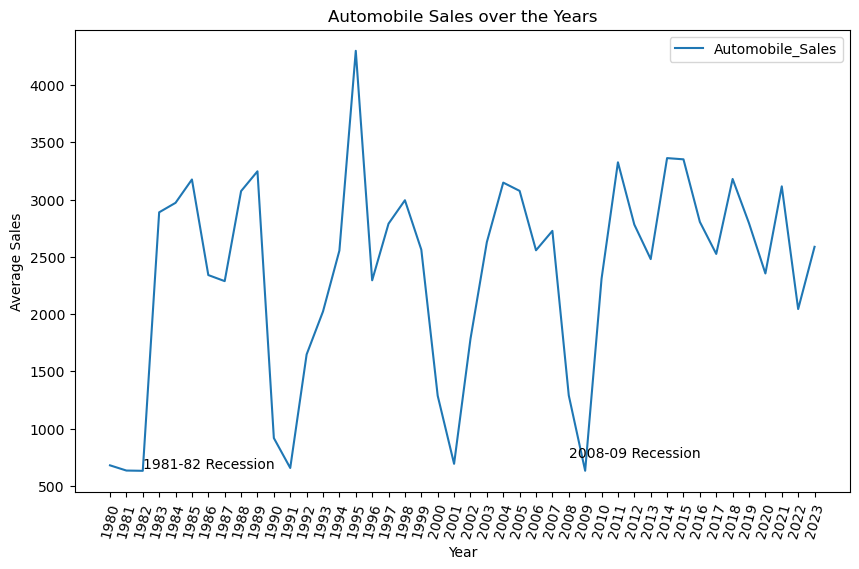

In [12]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Automobile Sales over the Years')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 750, '2008-09 Recession')
plt.legend()
plt.show()


***


####  Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


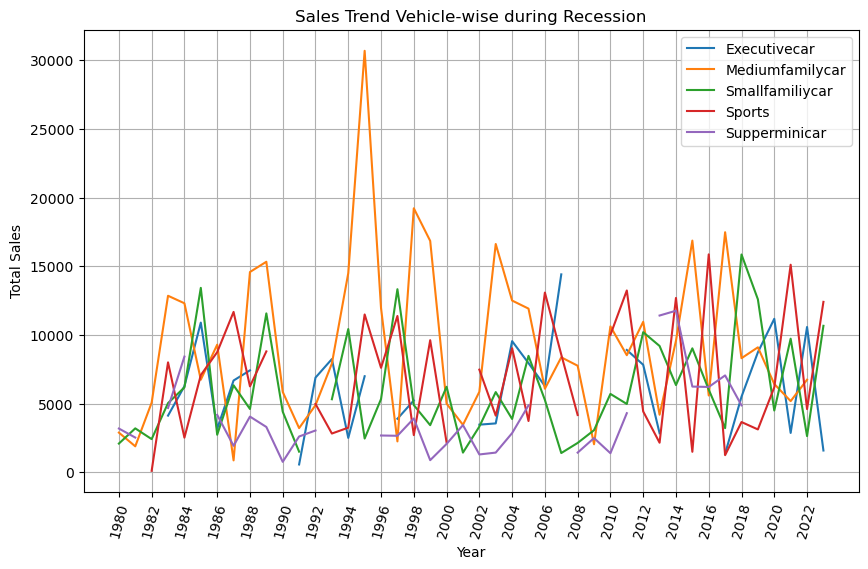

In [19]:
df_Mline = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(10, 6))

for column in df_Mline.columns:
    plt.plot(df_Mline.index, df_Mline[column], marker='', label=column)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xticks(list(range(1980, 2024, 2)), rotation=75)
plt.legend()
plt.grid(True)
plt.show()



#### From the above plot, insights that I have gained on the sales of various vehicle types


From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.

***

###  Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


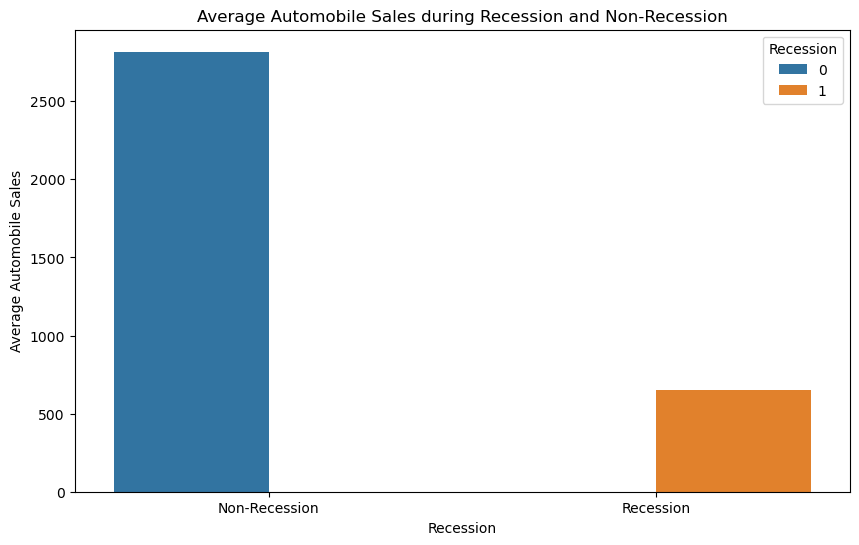

In [20]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


### compare the sales of different vehicle types during a recession and a non-recession period



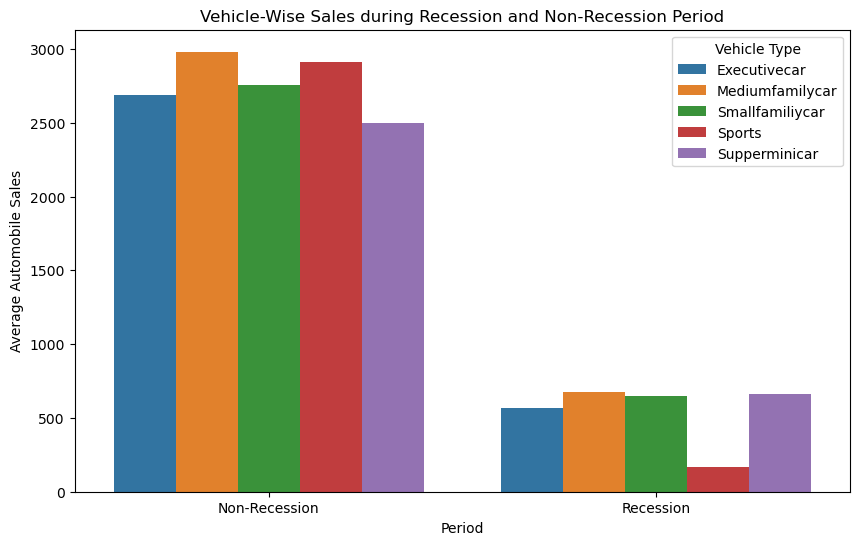

In [21]:
recession_data = df[df['Recession'] == 1]

dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type')
plt.show()



### From the above chart, insights that I have gained on the overall sales of automobiles during recession


From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

***

###  Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


#### How did the GDP vary over time during recession and non-recession periods? 



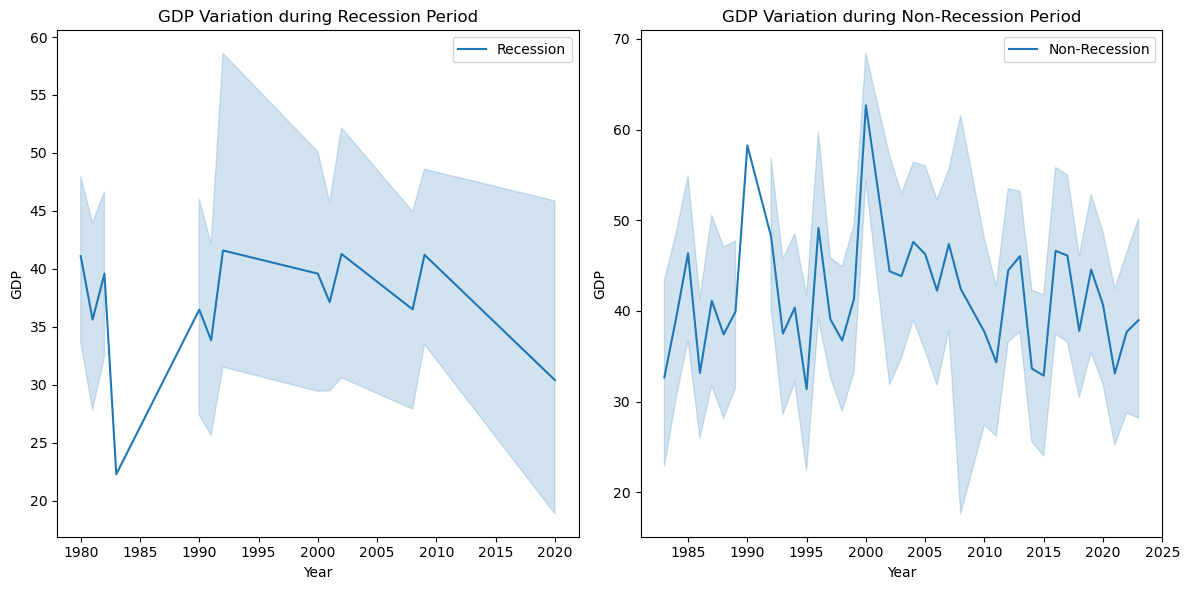

In [22]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]


fig=plt.figure(figsize=(12, 6))


ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2)


sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')


sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br>

***

###  Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.


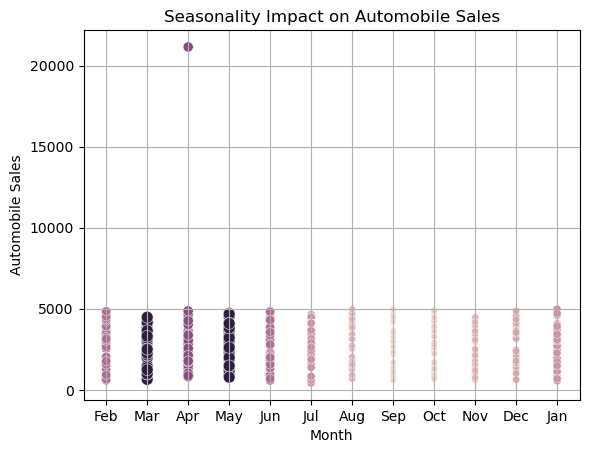

In [26]:
non_rec_data = df[df['Recession'] == 0]

size = non_rec_data['Seasonality_Weight']  

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size,hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.grid(True)
plt.show()


### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>


***

 ### Develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 

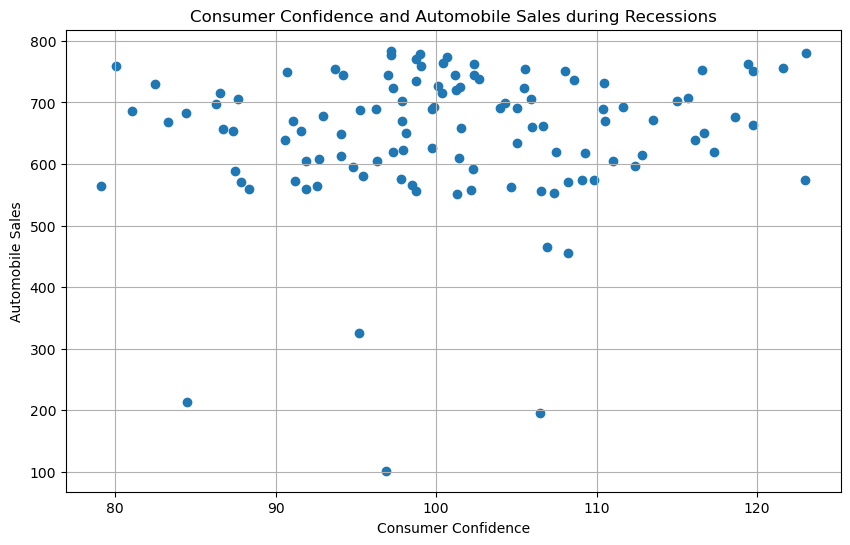

In [27]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.grid(True)
plt.show()




 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


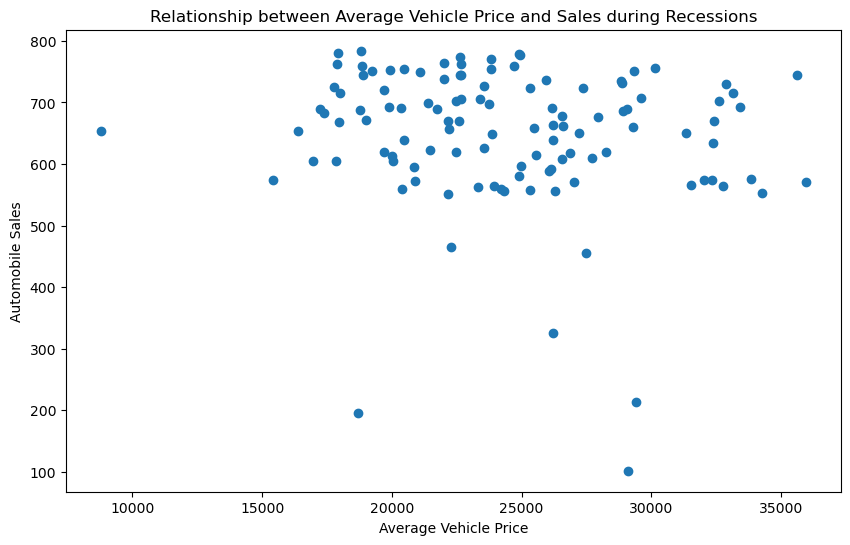

In [29]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()


### Inference
There is not much relation!<br><br>


***

 ### Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


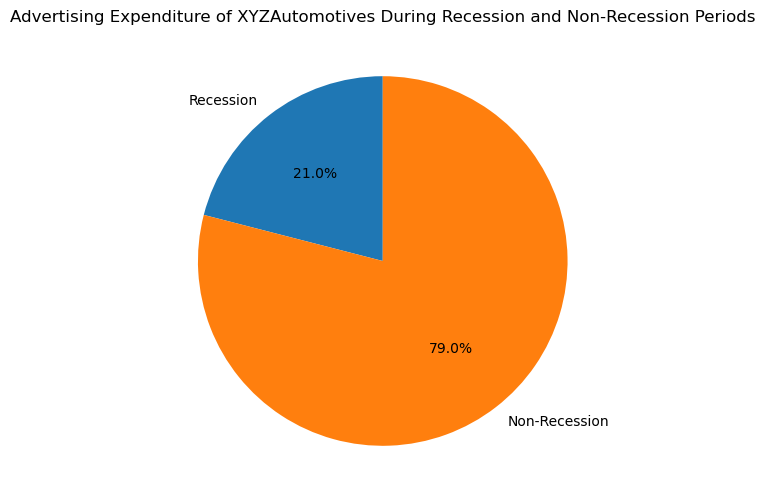

In [30]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure of XYZAutomotives During Recession and Non-Recession Periods')

plt.show()


#### From the above plot, Insights that i got from advertisement expenditure during recession and non recession periods


It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

***

### Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br> 


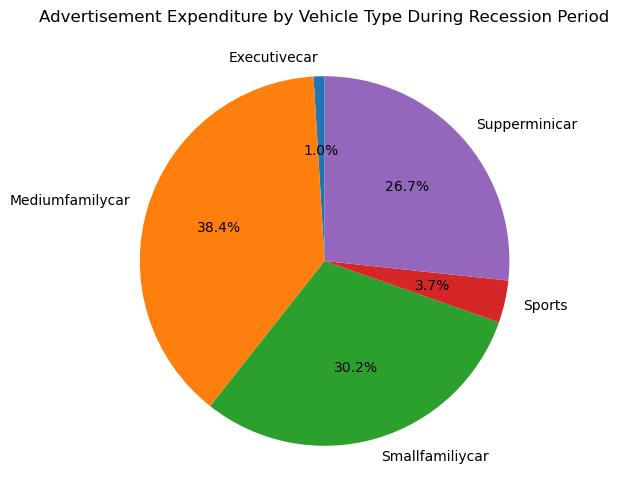

In [31]:
# Filter the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculate the advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement Expenditure by Vehicle Type During Recession Period')

plt.show()


### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>

***

 ### Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyzing the effect of the unemployment rate on vehicle type and sales during the Recession Period



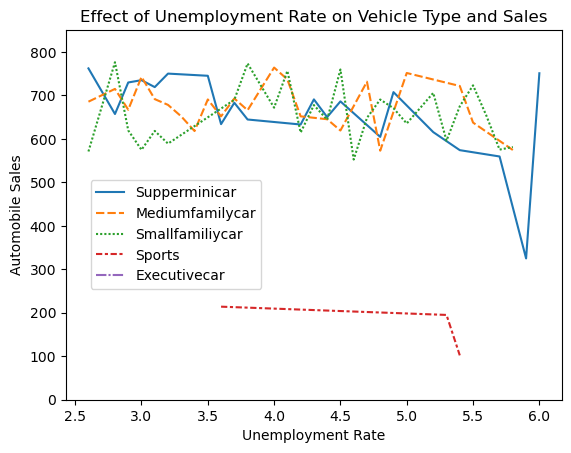

In [41]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', err_style=None)
plt.ylim(0, 850)  
plt.legend(loc=(0.05, 0.3))
plt.xlabel('Unemployment Rate') 
plt.ylabel('Automobile Sales') 
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales') 
plt.show()


#### From the above plot, Insights that i have gained on the sales of superminicar, smallfamilycar, mediumminicar


During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

### Create a map on the hightest sales region/offices of the company during recession period


In [43]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"
download(url, filename)


#### I found that the datset also contains the location/city for company offices. Now I want to show the recession impact on various offices/city sales by developing a choropleth


In [46]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1